In [328]:
from quantopian.pipeline import Pipeline ###Import pipeline for filtering stocks
from quantopian.pipeline.factors import DailyReturns,Returns ###Import 2 Factors: Daily Return, Returns
from quantopian.pipeline.data import USEquityPricing
from quantopian.research import run_pipeline,returns,prices,symbols
from datetime import timedelta, date
import pandas as pd
import numpy as np
from quantopian.pipeline.experimental import QTradableStocksUS
from quantopian.pipeline.filters import  StaticAssets
import matplotlib.pyplot as plt
from quantopian.pipeline.data import morningstar
from quantopian.pipeline.filters import Q500US
import matplotlib.pyplot as plt
from quantopian.pipeline.factors.fundamentals import MarketCap
from quantopian.pipeline.data import Fundamentals

# 1.Customer Defined Functions

In [2]:
'return the index of a timestamp in a pd.Series'
def find_index(timestamp,rt): ##timestamp: Pandas timestamp object; rt: a Pandas series
    for index,value in enumerate(rt.index):
        if value == timestamp:
            return index
    return pd.timestamp("1970-01-01 01:01")

In [19]:
'drop the dates to study reversal'
def drop_momentum_days(benchmark,target_ret):#Benchmark : daily return series including every work day
                                      #ret: the target return series 
    for idx,value in enumerate(target_ret):
        i = find_index(target_ret.index[idx],benchmark)
        #Exception Handler
        if (i+1) == target_ret.size:
            break
        #Set to nan    
        elif (benchmark.iloc[i] < 0.00):
            target_ret.iloc[idx]=np.nan
    
    return target_ret   #Notice: the NaNs are dropped

In [28]:
'drop the dates to study momentum'
def drop_reversal_days(benchmark,target_ret):#Benchmark : daily return series including every work day
                                             #ret: the target return series 
    for idx,value in enumerate(target_ret):
        i = find_index(target_ret.index[idx],benchmark)
        #Exception Handler
        if (i+1) == target_ret.size:
            break
        #Set to nan    
        elif (benchmark.iloc[i] > 0.00):
            target_ret.iloc[idx]=np.nan
    
    return target_ret   #Notice: the NaNs are dropped

In [315]:
'get returns of s&p 500 stocks'
'This function is depreciated in this script'
def get_returns():
    #returns are the factors we will return to caller
    returns = DailyReturns(inputs = [USEquityPricing.close])
    #Define the base universe as the first filter
    base_universe = QTradableStocksUS()
    #T is the length of sid
    inclusion_list = symbols(['ABT', 'ABBV', 'ACN', 'ACE', 'ADBE', 'ADT', 'AAP', 'AES', 'AET', 'AFL', 'AMG', 'A', 'GAS', 'APD', 'ARG', 'AKAM', 'AA', 'AGN', 'ALXN', 'ALLE', 'ADS', 'ALL', 'ALTR', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'AON', 'APA', 'AIV', 'AMAT', 'ADM', 'AIZ', 'T', 'ADSK', 'ADP', 'AN', 'AZO', 'AVGO', 'AVB', 'AVY', 'BHI', 'BLL', 'BAC', 'BK', 'BCR', 'BXLT', 'BAX', 'BBT', 'BDX', 'BBBY', 'BRK-B', 'BBY', 'BLX', 'HRB', 'BA', 'BWA', 'BXP', 'BSK', 'BMY', 'BRCM', 'BF-B', 'CHRW', 'CA', 'CVC', 'COG', 'CAM', 'CPB', 'COF', 'CAH', 'HSIC', 'KMX', 'CCL', 'CAT', 'CBG', 'CBS', 'CELG', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHK', 'CVX', 'CMG', 'CB', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CTXS', 'CLX', 'CME', 'CMS', 'COH', 'KO', 'CCE', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CSC', 'CAG', 'COP', 'CNX', 'ED', 'STZ', 'GLW', 'COST', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DLPH', 'DAL', 'XRAY', 'DVN', 'DO', 'DTV', 'DFS', 'DISCA', 'DISCK', 'DG', 'DLTR', 'D', 'DOV', 'DOW', 'DPS', 'DTE', 'DD', 'DUK', 'DNB', 'ETFC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMC', 'EMR', 'ENDP', 'ESV', 'ETR', 'EOG', 'EQT', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ES', 'EXC', 'EXPE', 'EXPD', 'ESRX', 'XOM', 'FFIV', 'FB', 'FAST', 'FDX', 'FIS', 'FITB', 'FSLR', 'FE', 'FSIV', 'FLIR', 'FLS', 'FLR', 'FMC', 'FTI', 'F', 'FOSL', 'BEN', 'FCX', 'FTR', 'GME', 'GPS', 'GRMN', 'GD', 'GE', 'GGP', 'GIS', 'GM', 'GPC', 'GNW', 'GILD', 'GS', 'GT', 'GOOGL', 'GOOG', 'GWW', 'HAL', 'HBI', 'HOG', 'HAR', 'HRS', 'HIG', 'HAS', 'HCA', 'HCP', 'HCN', 'HP', 'HES', 'HPQ', 'HD', 'HON', 'HRL', 'HSP', 'HST', 'HCBK', 'HUM', 'HBAN', 'ITW', 'IR', 'INTC', 'ICE', 'IBM', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IRM', 'JEC', 'JBHT', 'JNJ', 'JCI', 'JOY', 'JPM', 'JNPR', 'KSU', 'K', 'KEY', 'GMCR', 'KMB', 'KIM', 'KMI', 'KLAC', 'KSS', 'KRFT', 'KR', 'LB', 'LLL', 'LH', 'LRCX', 'LM', 'LEG', 'LEN', 'LVLT', 'LUK', 'LLY', 'LNC', 'LLTC', 'LMT', 'L', 'LOW', 'LYB', 'MTB', 'MAC', 'M', 'MNK', 'MRO', 'MPC', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MAT', 'MKC', 'MCD', 'MHFI', 'MCK', 'MJN', 'MMV', 'MDT', 'MRK', 'MET', 'KORS', 'MCHP', 'MU', 'MSFT', 'MHK', 'TAP', 'MDLZ', 'MON', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MUR', 'MYL', 'NDAQ', 'NOV', 'NAVI', 'NTAP', 'NFLX', 'NWL', 'NFX', 'NEM', 'NWSA', 'NEE', 'NLSN', 'NKE', 'NI', 'NE', 'NBL', 'JWN', 'NSC', 'NTRS', 'NOC', 'NRG', 'NUE', 'NVDA', 'ORLY', 'OXY', 'OMC', 'OKE', 'ORCL', 'OI', 'PCAR', 'PLL', 'PH', 'PDCO', 'PAYX', 'PNR', 'PBCT', 'POM', 'PEP', 'PKI', 'PRGO', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PBI', 'PCL', 'PNC', 'RL', 'PPG', 'PPL', 'PX', 'PCP', 'PCLN', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PSA', 'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RRC', 'RTN', 'O', 'RHT', 'REGN', 'RF', 'RSG', 'RAI', 'RHI', 'ROK', 'COL', 'ROP', 'ROST', 'RLC', 'R', 'CRM', 'SNDK', 'SCG', 'SLB', 'SNI', 'STX', 'SEE', 'SRE', 'SHW', 'SIAL', 'SPG', 'SWKS', 'SLG', 'SJM', 'SNA', 'SO', 'LUV', 'SWN', 'SE', 'STJ', 'SWK', 'SPLS', 'SBUX', 'HOT', 'STT', 'SRCL', 'SYK', 'STI', 'SYMC', 'SYY', 'TROW', 'TGT', 'TEL', 'TE', 'TGNA', 'THC', 'TDC', 'TSO', 'TXN', 'TXT', 'HSY', 'TRV', 'TMO', 'TIF', 'TWX', 'TWC', 'TJK', 'TMK', 'TSS', 'TSCO', 'RIG', 'TRIP', 'FOXA', 'TSN', 'TYC', 'UA', 'UNP', 'UNH', 'UPS', 'URI', 'UTX', 'UHS', 'UNM', 'URBN', 'VFC', 'VLO', 'VAR', 'VTR', 'VRSN', 'VZ', 'VRTX', 'VIAB', 'V', 'VNO', 'VMC', 'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'ANTM', 'WFC', 'WDC', 'WU', 'WY', 'WHR', 'WFM', 'WMB', 'WEC', 'WYN', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XL', 'XYL', 'YHOO', 'YUM', 'ZBH', 'ZION', 'ZTS'])
    inclusion_filter = StaticAssets(inclusion_list)    
    pipe = Pipeline(columns={'daily_returns':returns},
                    screen = (base_universe & inclusion_filter))
    return pipe

In [396]:
'get returns of s&p 500 stocks'
'This function is adopted in this script'
def get_caps(symbol_list):
    market_cap =  Fundamentals.market_cap.latest  
    #Define the base universe as the first filter
    base_universe = QTradableStocksUS()
    #T is the length of sid
    inclusion_list = symbols(symbol_list)
    inclusion_filter = StaticAssets(inclusion_list)    
    pipe = Pipeline(columns={'Caps':market_cap},
                    screen = (base_universe & inclusion_filter))
    return pipe

In [6]:
'convert series to dataframe'
def to_dataframe(rt):
    i = pd.Series(rt.index)
    v = pd.Series(rt.values)
    p = pd.DataFrame([rt_1.index,rt_1.values])
    p = p.T
    
    cols = ['Date','Return']
    p.columns = cols
    return p

In [45]:
def get_next_oneday_return(benchmark,target_rt):
    
    next_day_returns = []
    #Find the index of target_rt
    for idx,value in enumerate(target_rt):
        i = find_index(target_rt.index[idx],benchmark)  
        if i == target_rt.size-1 :
            break
        else : 
            next_day_returns.append(benchmark.iloc[i])
    
    return pd.Series(next_day_returns)

In [8]:
'Customer Defined Stock Class'
class Stock:
    symbol=''
    'n-neg means n-days return of benchmark is negative '
    rt_1 = pd.Series([])
    '3-Day Return Series'
    rt_3_neg_mom = pd.Series([])
    rt_3_neg_rev = pd.Series([])
    '4-Day Return Series'
    rt_4_neg_mom = pd.Series([])
    rt_4_neg_rev = pd.Series([])
    '5-Day Return Series'
    rt_5_neg_mom = pd.Series([])
    rt_5_neg_rev = pd.Series([])
    def __init__(self, symbol_str):
        self.symbol = symbol_str

In [163]:
class counter:
    
    symbol=''
    ###To count the number of momentum and reversal
    rev_count_3 = 0
    mom_count_3 = 0
    ###To count the number of momentum and reversal
    rev_count_4 = 0
    mom_count_4 = 0
    ###To count the number of momentum and reversal
    rev_count_5 = 0
    mom_count_5 = 0
    ###To count the number of momentum and reversal
    ts_mom_3 = pd.Series([])
    ts_rev_3 = pd.Series([])
    ###To count the number of momentum and reversal
    ts_mom_4 = pd.Series([])
    ts_rev_4 = pd.Series([])
    ###To count the number of momentum and reversal
    ts_mom_5 = pd.Series([])
    ts_rev_5 = pd.Series([])
    
    def __init__(self,symbol_str):
        self.symbol = symbol_str

In [164]:
class counter_8964:
    ###This class is named for memorizing our great hero : HanZhang Fang
    ct = counter('')
    rev_mom_3 = 0
    rev_mom_4 = 0
    rev_mom_5 = 0
    def __init__(self,ct,rev_mom_3,rev_mom_4,rev_mom_5):
        self.ct = ct
        self.rev_mom_3 = rev_mom_3
        self.rev_mom_4 = rev_mom_4
        self.rev_mom_5 = rev_mom_5

In [25]:
def get_mom_and_rev(symbol_list):
    stock_list = []
    for idx,syb in enumerate(symbol_list):
        rt_1 = returns(symbol_list[idx],start = '2009-03-09',end = '2019-04-22',periods=1)
        rt_3 = returns(symbol_list[idx],start = '2009-03-09',end = '2019-04-22',periods=3)
        rt_4 = returns(symbol_list[idx],start = '2009-03-09',end = '2019-04-22',periods=4)
        rt_5 = returns(symbol_list[idx],start = '2009-03-09',end = '2019-04-22',periods=5)
        #Drop for continuous *** days and reversal
        rt_3_neg_rev = rt_3[rt_3 < 0.0 ]
        rt_3_neg_rev = drop_momentum_days(rt_1,rt_3_neg_rev)
        rt_3_neg_rev = rt_3_neg_rev.dropna()
    
        rt_4_neg_rev = rt_4[rt_4 < 0.0 ]
        rt_4_neg_rev = drop_momentum_days(rt_1,rt_4_neg_rev)
        rt_4_neg_rev = rt_4_neg_rev.dropna()
    
        rt_5_neg_rev = rt_5[rt_5 < 0.0 ]
        rt_5_neg_rev = drop_momentum_days(rt_1,rt_5_neg_rev)
        rt_5_neg_rev = rt_5_neg_rev.dropna()
        
        #Drop for continuous *** days and momentum
        rt_3_neg_mom = rt_3[rt_3 > 0.0 ]
        rt_3_neg_mom = drop_reversal_days(rt_1,rt_3_neg_mom)
        rt_3_neg_mom = rt_3_neg_mom.dropna()
    
        rt_4_neg_mom = rt_4[rt_4 > 0.0 ]
        rt_4_neg_mom = drop_reversal_days(rt_1,rt_4_neg_mom)
        rt_4_neg_mom = rt_4_neg_mom.dropna()
    
        rt_5_neg_mom = rt_5[rt_5 > 0.0 ]
        rt_5_neg_mom = drop_reversal_days(rt_1,rt_5_neg_mom)
        rt_5_neg_mom = rt_5_neg_mom.dropna()
    
    
        stock = Stock(symbol_str = symbol_list[idx])
    
    #ind_rt:returns time series of an individual stock
        ind_rt = returns(symbol_list[idx],start = '2009-03-09',end = '2019-04-22',periods=1)
    #Filter returns according to benchmark returns
        stock.rt_1 = rt_1
        stock.rt_3_neg_rev = rt_3_neg_rev
        stock.rt_3_neg_mom = rt_3_neg_mom
        stock.rt_4_neg_rev = rt_4_neg_rev
        stock.rt_4_neg_mom = rt_4_neg_mom
        stock.rt_5_neg_mom = rt_5_neg_mom
        stock.rt_5_neg_rev = rt_5_neg_rev
    #Append th Stock Object to the stock list
        stock_list.append(stock)
        print idx
    return stock_list
    

In [167]:
def update_counters(stock_list):
    counters = []
    for idx,indstock in enumerate(stock_list):
        counters.append(counter(symbol_str = stock_list[idx].symbol))
        
        ts_rev_3 = get_next_oneday_return(stock_list[idx].rt_1,stock_list[idx].rt_3_neg_rev)
        ts_mom_3 = get_next_oneday_return(stock_list[idx].rt_1,stock_list[idx].rt_3_neg_mom)
        
        ts_rev_4 = get_next_oneday_return(stock_list[idx].rt_1,stock_list[idx].rt_4_neg_rev)
        ts_mom_4 = get_next_oneday_return(stock_list[idx].rt_1,stock_list[idx].rt_4_neg_mom)
        
        ts_rev_5 = get_next_oneday_return(stock_list[idx].rt_1,stock_list[idx].rt_5_neg_rev)
        ts_mom_5 = get_next_oneday_return(stock_list[idx].rt_1,stock_list[idx].rt_5_neg_mom)
        
        counters[idx].ts_mom_3 = ts_mom_3
        counters[idx].ts_mom_3 = ts_mom_3
        counters[idx].rev_count_3 = ts_rev_3.size
        counters[idx].mom_count_3 = ts_mom_3.size
        
        counters[idx].ts_mom_4 = ts_mom_4
        counters[idx].ts_mom_4 = ts_mom_4
        counters[idx].rev_count_4 = ts_rev_4.size
        counters[idx].mom_count_4 = ts_mom_4.size
        
        counters[idx].ts_mom_5 = ts_mom_5
        counters[idx].ts_mom_5 = ts_mom_5
        counters[idx].rev_count_5 = ts_rev_5.size
        counters[idx].mom_count_5 = ts_mom_5.size
        
        print idx
        
    return counters

In [222]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

# 2. Get S&P500 Individual Stocks 

## 2.1 Compute Returns of S&P 500 Individual Returns

In [29]:
syml_01 = ['ABT', 'ABBV', 'ACN', 'ACE', 'ADBE', 'ADT', 'AAP', 'AES', 'AET', 'AFL', 'AMG', 'A', 'GAS', 'APD', 'ARG', 'AKAM', 'AA', 'AGN', 'ALXN', 'ALLE', 'ADS', 'ALL', 'ALTR', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'AON', 'APA', 'AIV', 'AMAT']
syml_02 = ['ADM', 'AIZ', 'T', 'ADSK', 'ADP', 'AN', 'AZO', 'AVGO', 'AVB', 'AVY', 'BHI', 'BLL', 'BAC', 'BK', 'BCR', 'BXLT', 'BAX', 'BBT', 'BDX', 'BBBY', 'BRK-B', 'BBY', 'BLX', 'HRB', 'BA', 'BWA', 'BXP','BMY', 'BRCM', 'BF-B', 'CHRW', 'CA', 'CVC', 'COG', 'CAM', 'CPB', 'COF', 'CAH', 'HSIC', 'KMX', 'CCL', 'CAT', 'CBG']
syml_03 = ['CBS', 'CELG', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHK', 'CVX', 'CMG', 'CB', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CTXS', 'CLX', 'CME', 'CMS', 'COH', 'KO', 'CCE', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CSC', 'CAG', 'COP', 'CNX', 'ED', 'STZ', 'GLW', 'COST', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI']
syml_04 = ['DVA', 'DE', 'DLPH', 'DAL', 'XRAY', 'DVN', 'DO', 'DTV', 'DFS', 'DISCA', 'DISCK', 'DG', 'DLTR', 'D', 'DOV', 'DOW', 'DPS', 'DTE', 'DD', 'DUK', 'DNB', 'ETFC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMC', 'EMR', 'ENDP', 'ESV', 'ETR', 'EOG', 'EQT', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ES', 'EXC']
syml_05 = ['EXPE', 'EXPD', 'ESRX', 'XOM', 'FFIV', 'FB', 'FAST', 'FDX', 'FIS', 'FITB', 'FSLR', 'FE','FLIR', 'FLS', 'FLR', 'FMC', 'FTI', 'F', 'FOSL', 'BEN', 'FCX', 'FTR', 'GME', 'GPS', 'GRMN', 'GD', 'GE', 'GGP', 'GIS', 'GM', 'GPC', 'GNW', 'GILD', 'GS', 'GT','GOOG', 'GWW', 'HAL', 'HBI', 'HOG', 'HAR', 'HRS', 'HIG', 'HAS']
syml_06 = ['HCA', 'HCP', 'HCN', 'HP', 'HES', 'HPQ', 'HD', 'HON', 'HRL', 'HSP', 'HST', 'HCBK', 'HUM', 'HBAN', 'ITW', 'IR', 'INTC', 'ICE', 'IBM', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IRM', 'JEC', 'JBHT', 'JNJ', 'JCI', 'JOY', 'JPM', 'JNPR', 'KSU', 'K', 'KEY', 'GMCR', 'KMB', 'KIM', 'KMI', 'KLAC', 'KSS', 'KRFT', 'KR', 'LB']
syml_07 = ['LLL', 'LH', 'LRCX', 'LM', 'LEG', 'LEN', 'LVLT', 'LUK', 'LLY', 'LNC', 'LLTC', 'LMT', 'L', 'LOW', 'LYB', 'MTB', 'MAC', 'M', 'MNK', 'MRO', 'MPC', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MAT', 'MKC', 'MCD', 'MHFI', 'MCK', 'MJN', 'MMV', 'MDT', 'MRK', 'MET', 'KORS', 'MCHP', 'MU', 'MSFT', 'MHK', 'TAP']
syml_08 = ['MDLZ', 'MON', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MUR', 'MYL', 'NDAQ', 'NOV', 'NAVI', 'NTAP', 'NFLX', 'NWL', 'NFX', 'NEM', 'NWSA', 'NEE', 'NLSN', 'NKE', 'NI', 'NE', 'NBL', 'JWN', 'NSC', 'NTRS', 'NOC', 'NRG', 'NUE', 'NVDA', 'ORLY', 'OXY', 'OMC', 'OKE', 'ORCL', 'OI', 'PCAR', 'PLL', 'PH']
syml_09 = ['PDCO', 'PAYX', 'PNR', 'PBCT', 'POM', 'PEP', 'PKI', 'PRGO', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PBI', 'PCL', 'PNC', 'RL', 'PPG', 'PPL', 'PX', 'PCP', 'PCLN', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PSA', 'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RRC', 'RTN', 'O', 'RHT', 'REGN', 'RF', 'RSG']
syml_010 = ['RAI', 'RHI', 'ROK', 'COL', 'ROP', 'ROST','R', 'CRM', 'SNDK', 'SCG', 'SLB', 'SNI', 'STX', 'SEE', 'SRE', 'SHW', 'SIAL', 'SPG', 'SWKS', 'SLG', 'SJM', 'SNA', 'SO', 'LUV', 'SWN', 'SE', 'STJ', 'SWK', 'SPLS', 'SBUX', 'HOT', 'STT', 'SRCL', 'SYK', 'STI', 'SYMC', 'SYY', 'TROW', 'TGT', 'TEL', 'TE', 'TGNA', 'THC']
syml_011 = ['TDC', 'TSO', 'TXN', 'TXT', 'HSY', 'TRV', 'TMO', 'TIF', 'TWX', 'TWC','TMK', 'TSS', 'TSCO', 'RIG', 'TRIP', 'FOXA', 'TSN', 'TYC', 'UA', 'UNP', 'UNH', 'UPS', 'URI', 'UTX', 'UHS', 'UNM', 'URBN', 'VFC', 'VLO', 'VAR', 'VTR', 'VRSN', 'VZ', 'VRTX', 'VIAB', 'V', 'VNO', 'VMC', 'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'ANTM', 'WFC', 'WDC', 'WU', 'WY', 'WHR', 'WFM', 'WMB', 'WEC', 'WYN', 'WYNN', 'XEL']

In [35]:
#Hold the constant variables
perm_stl_01 = stl_01
perm_stl_02 = stl_02
perm_stl_03 = stl_03
perm_stl_04 = stl_04
perm_stl_05 = stl_05
perm_stl_06 = stl_06
perm_stl_07 = stl_07
perm_stl_08 = stl_08
perm_stl_09 = stl_09
perm_stl_10 = stl_10
perm_stl_11 = stl_11

In [ ]:
ctl_01 = update_counters(stl_01)
ctl_02 = update_counters(stl_02)
ctl_03 = update_counters(stl_03)
ctl_04 = update_counters(stl_04)
ctl_05 = update_counters(stl_05)
ctl_06 = update_counters(stl_06)
ctl_07 = update_counters(stl_07)
ctl_08 = update_counters(stl_08)
ctl_09 = update_counters(stl_09)
ctl_010 = update_counters(stl_10)
ctl_011 = update_counters(stl_11)

counter_list = np.concatenate((ctl_01,ctl_02,ctl_03,ctl_04,ctl_05,ctl_06,ctl_07,ctl_08,ctl_09,ctl_010,ctl_011))

#  3.Analyze the Performance

In [294]:
symbol_list = []
rev_mom_3 = []
rev_mom_4 = []
rev_mom_5 = []

for idx,ele in enumerate(counter_list):
    symbol_list.append(counter_list[idx].symbol)
    rev_mom_3.append(float(ele.rev_count_3)/ele.mom_count_3)
    rev_mom_4.append(float(ele.rev_count_4)/ele.mom_count_4)
    rev_mom_5.append(float(ele.rev_count_5)/ele.mom_count_5)

table_rev_mom = pd.DataFrame([pd.Series(symbol_list),pd.Series(rev_mom_3),pd.Series(rev_mom_4),pd.Series(rev_mom_5)]).transpose()
table_rev_mom.columns=['Symbol','Rev:Mom3','Rev:Mom4','Rev:Mom5']
table_rev_mom

,Symbol,Rev:Mom3,Rev:Mom4,Rev:Mom5
0,ABT,5.06944,0.431328,0.904922
1,ABBV,0.976285,0.898649,0.916129
2,ACN,0.101952,3.73892,0.692449
3,ACE,0.130435,0.477011,4.45213
4,ADBE,0.758772,8.28889,3.91667
5,ADT,1.03704,1.08,1.22449
6,AAP,5.83824,0.491935,0.489433
7,AES,0.4609,1.00682,0.314346
8,AET,1.68445,0.751037,0.415852
9,AFL,0.424581,4.05155,3.76364


# 3.1.1 Is it a good idea to capturing reversal? (Return < 0)

In [295]:
rev_times_3 = table_rev_mom [table_rev_mom['Rev:Mom3']>1]['Rev:Mom3'].size
rev_times_4= table_rev_mom [table_rev_mom['Rev:Mom4']>1]['Rev:Mom4'].size
rev_times_5= table_rev_mom [table_rev_mom['Rev:Mom5']>1]['Rev:Mom5'].size

print rev_times_3
print rev_times_4
print rev_times_5

157
152
166


1.According to the reversal times of 3 days, 4 days, 5 days, we find that generally the reversal frequency is significantly lower than the momentum frequency, and there are no significant differences of reversal times between 3/4/5 days

## 3.1.2 Statistical Attributes

1.57997734935
2.44307599015


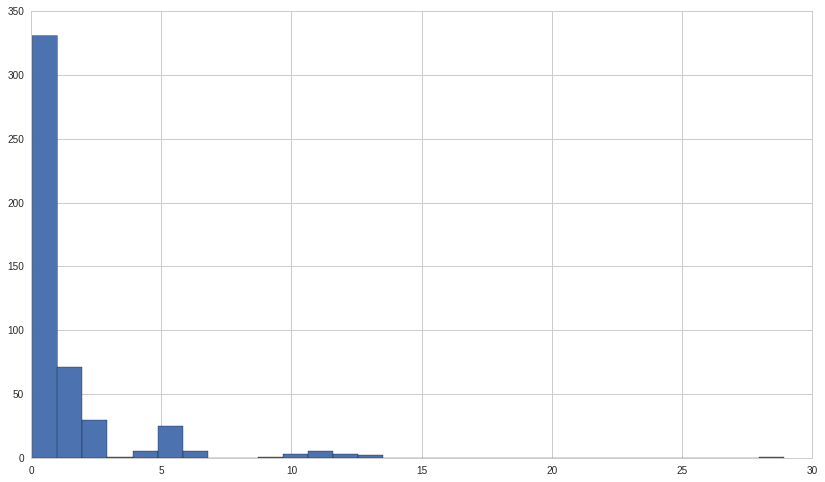

In [307]:
### First,look for the distribution of reversal and momentum
plt.hist(table_rev_mom['Rev:Mom3'],bins = 30)
print table_rev_mom['Rev:Mom3'].mean()
print table_rev_mom['Rev:Mom3'].std()

1.54463948105
2.17033475677


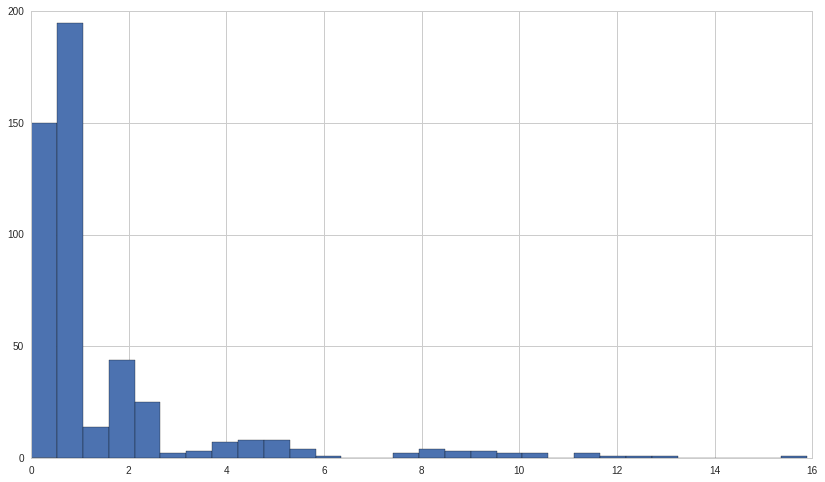

In [306]:
plt.hist(table_rev_mom['Rev:Mom4'],bins = 30)
print table_rev_mom['Rev:Mom4'].mean()
print table_rev_mom['Rev:Mom4'].std()

1.57995549362
1.9657340665


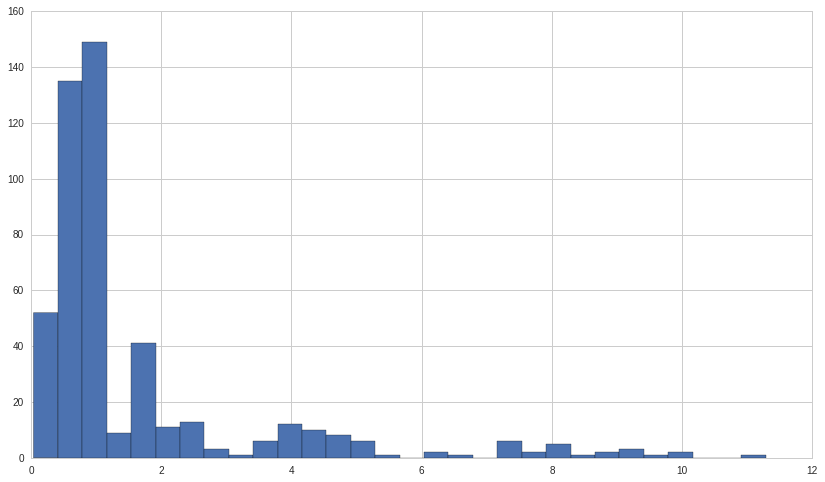

In [305]:
plt.hist(table_rev_mom['Rev:Mom5'],bins = 30)
print table_rev_mom['Rev:Mom5'].mean()
print table_rev_mom['Rev:Mom5'].std()

2.According to the mean, the average performance of the reversal or momentum does not differentiate very much, which means the reversal cannot beat momentum neither 3 or 4 or 5 days

3.According to the standard deviation, the extrem performance of reversal or momentum tends to be the same as the horizon enlarges

4.Here is a very significant fat-tail phenomenon.

## 3.2.1 Analyze Exceptional Performance of 3-days

In [410]:
temp_table = table_rev_mom
temp_table = temp_table.sort_values(by = ['Rev:Mom3'])
top_50_symbols = temp_table['Symbol'].iloc[0:50]
bottom_50_symbols = temp_table['Symbol'].iloc[432:482]
#a = top_50_symbols.values.tolist()

In [429]:
temp_table

,Symbol,Rev:Mom3,Rev:Mom4,Rev:Mom5
56,BCR,0.0452196,0.85335,4.04819
414,SBUX,0.0491429,0.417314,6.39024
38,AON,0.05,0.82241,0.842162
45,ADSK,0.0542099,2.525,0.464835
213,HIG,0.0612009,9.45783,4.72189
166,EQR,0.0613208,0.909513,2.48
474,WU,0.0622754,0.143519,4.34694
361,PPL,0.0630734,0.478405,0.471597
460,VZ,0.0640097,0.478873,0.485779
378,RRC,0.064557,1.12516,0.970339


In [413]:
'2019-04-23'
caps_top = run_pipeline(get_caps(top_50_symbols.values.tolist()),'2019-04-23','2019-04-23')
caps_bottom = run_pipeline(get_caps(bottom_50_symbols.values.tolist()),'2019-04-23','2019-04-23')
print caps_top['Caps'].values.mean() 
print caps_bottom['Caps'].values.mean()

68134875373.7
59636734059.9


In [414]:
'2018-04-23'
caps_top = run_pipeline(get_caps(top_50_symbols.values.tolist()),'2018-04-23','2018-04-23')
caps_bottom = run_pipeline(get_caps(bottom_50_symbols.values.tolist()),'2018-04-23','2018-04-23')
print caps_top['Caps'].values.mean() 
print caps_bottom['Caps'].values.mean()

64896249691.9
55952230710.4


In [415]:
'2017-04-23'
caps_top = run_pipeline(get_caps(top_50_symbols.values.tolist()),'2017-04-23','2017-04-23')
caps_bottom = run_pipeline(get_caps(bottom_50_symbols.values.tolist()),'2017-04-23','2017-04-23')
print caps_top['Caps'].values.mean() 
print caps_bottom['Caps'].values.mean()

50340357687.4
53662222013.3


In [416]:
'2016-04-23'
caps_top = run_pipeline(get_caps(top_50_symbols.values.tolist()),'2016-04-23','2016-04-23')
caps_bottom = run_pipeline(get_caps(bottom_50_symbols.values.tolist()),'2016-04-23','2016-04-23')
print caps_top['Caps'].values.mean() 
print caps_bottom['Caps'].values.mean()

47254116351.6
50113949588.3


In [417]:
'2015-04-23'
caps_top = run_pipeline(get_caps(top_50_symbols.values.tolist()),'2015-04-23','2015-04-23')
caps_bottom = run_pipeline(get_caps(bottom_50_symbols.values.tolist()),'2015-04-23','2015-04-23')
print caps_top['Caps'].values.mean() 
print caps_bottom['Caps'].values.mean()

45379537919.6
49187040335.9


In [418]:
'2014-04-23'
caps_top = run_pipeline(get_caps(top_50_symbols.values.tolist()),'2014-04-23','2014-04-23')
caps_bottom = run_pipeline(get_caps(bottom_50_symbols.values.tolist()),'2014-04-23','2014-04-23')
print caps_top['Caps'].values.mean() 
print caps_bottom['Caps'].values.mean()

41413450605.2
44607540102.0


In [419]:
'2013-04-23'
caps_top = run_pipeline(get_caps(top_50_symbols.values.tolist()),'2013-04-23','2014-03-23')
caps_bottom = run_pipeline(get_caps(bottom_50_symbols.values.tolist()),'2013-04-23','2014-03-23')
print caps_top['Caps'].values.mean() 
print caps_bottom['Caps'].values.mean()

37745669349.6
41901926163.7


In [421]:
'2012-04-23'
caps_top = run_pipeline(get_caps(top_50_symbols.values.tolist()),'2012-04-23','2012-04-23')
caps_bottom = run_pipeline(get_caps(bottom_50_symbols.values.tolist()),'2012-04-23','2012-04-23')
print caps_top['Caps'].values.mean() 
print caps_bottom['Caps'].values.mean()

30624155833.8
34646756644.8


In [422]:
'2011-04-23'
caps_top = run_pipeline(get_caps(top_50_symbols.values.tolist()),'2011-04-23','2011-04-23')
caps_bottom = run_pipeline(get_caps(bottom_50_symbols.values.tolist()),'2011-04-23','2011-04-23')
print caps_top['Caps'].values.mean() 
print caps_bottom['Caps'].values.mean()

30535032035.5
32818232769.8


In [423]:
'2010-04-23'
caps_top = run_pipeline(get_caps(top_50_symbols.values.tolist()),'2010-04-23','2011-04-23')
caps_bottom = run_pipeline(get_caps(bottom_50_symbols.values.tolist()),'2010-04-23','2011-04-23')
print caps_top['Caps'].values.mean() 
print caps_bottom['Caps'].values.mean()

27061076705.9
29916394016.5


In [424]:
'2009-04-23'
caps_top = run_pipeline(get_caps(top_50_symbols.values.tolist()),'2009-04-23','2009-04-23')
caps_bottom = run_pipeline(get_caps(bottom_50_symbols.values.tolist()),'2009-04-23','2009-04-23')
print caps_top['Caps'].values.mean() 
print caps_bottom['Caps'].values.mean()

17918902256.2
21523691354.0


In [425]:
'2008-04-23'
caps_top = run_pipeline(get_caps(top_50_symbols.values.tolist()),'2008-04-23','2008-04-23')
caps_bottom = run_pipeline(get_caps(bottom_50_symbols.values.tolist()),'2008-04-23','2008-04-23')
print caps_top['Caps'].values.mean() 
print caps_bottom['Caps'].values.mean()

29194925859.5
35382716337.7


5.Important Phenomenon: We will find that in a long-time bull market after 2008, the stocks which have an strong overall reversal tends to have a better capitilization growth, which verify the guess that the stocks with the better long-time performance tends to perform better in reversal. We can find that strong reversal stocks' cap increase by 4 times but the weak reversal stocks increase only by 2.8 times  

# Appendix: Backup Objects (Depreciated in Quantopian)

In [77]:
import pickle as pk
stl = []
stock_list_file = open('StockList','w')
stl.append(perm_stl_01)
stl.append(perm_stl_02)
stl.append(perm_stl_03)
stl.append(perm_stl_04)
stl.append(perm_stl_05)
stl.append(perm_stl_06)
stl.append(perm_stl_07)
stl.append(perm_stl_08)
stl.append(perm_stl_09)
stl.append(perm_stl_10)
stl.append(perm_stl_11)
pk.dump(stl,stock_list_file)


SandboxViolation: Importing pickle raised ImportError. No modules or attributes with a similar name were found.

# Don't Run the following code with permit

In [ ]:
stl_01 = get_mom_and_rev(syml_01)
stl_02 = get_mom_and_rev(syml_02)
stl_03 = get_mom_and_rev(syml_03)
stl_04 = get_mom_and_rev(syml_04)
stl_05 = get_mom_and_rev(syml_05)
stl_06 = get_mom_and_rev(syml_06)
stl_07 = get_mom_and_rev(syml_07)
stl_08 = get_mom_and_rev(syml_08)
stl_09 = get_mom_and_rev(syml_09)
stl_10 = get_mom_and_rev(syml_010)
stl_11 = get_mom_and_rev(syml_011)

#Hold the constant variables
perm_ctl_01 = ctl_01
perm_ctl_02 = ctl_02
perm_ctl_03 = ctl_03
perm_ctl_04 = ctl_04
perm_ctl_05 = ctl_05
perm_ctl_06 = ctl_06
perm_ctl_07 = ctl_07
perm_ctl_08 = ctl_08
perm_ctl_09 = ctl_09
perm_ctl_10 = ctl_010
perm_ctl_11 = ctl_011